# House Prices

# 1. Defining the Question

### a) Specifying the Question

> We are to study the factors that affect housing prices on real estate properties that was collected over the past few months.We will also create a model that would allow the company to accurately predict the sale of prices.

### b) Defining the Metric for Success

### c) Understanding the context 

Hass Consulting Company which is a real estate leader with over 25 years of experience. HassConsult offers investment-grade developments all over the City. The developments they offer have been conceptualized by our development team to be high quality assets using a data-driven approach in planning and design, that gears property for high rental returns and an escalated rate of capital growth. 

### d) Recording the Experimental Design

1. Loading the datasets
2. Data Preparation
3. Investigating the dataset
4. Data cleaning
5. Exploratory Data Analysis(Univariate, Bivariate, Multivariate)
6. Modelling
7. Answering the question
8. Conclusion
9. Recommendation
10. Follow up questions

### e) Data Relevance

We will measure the relevance after doing analysis of the dataset.

# 2. Reading the Data

## Importing Libraries

In [16]:
# Importing libraries
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading datasets

In [17]:
housing = pd.read_csv('/home/addam/Downloads/core/lasso/Independent Project Week 7 - house_data.csv')

# 3. Checking the Data

In [18]:
# top of dataset
housing.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

In [19]:
# bottom of dataset

housing.tail()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
21608   263000018  360000.0         3       2.50         1530      1131   
21609  6600060120  400000.0         4       2.50         2310      5813   
21610  1523300141  402101.0         2       0.75         1020      1350   
21611   291310100  400000.0         3       2.50         1600      2388   
21612  1523300157  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
21608     3.0           0     0          3      8        1530              0   
21609     2.0           0     0          3      8        2310              0   
21610     2.0           0     0          3      7        1020              0   
21611     2.0           0     0          3      8        1600              0   
21612     2.0           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357

In [20]:
# Determining the no. of records in our ranking dataset
#
housing.count()

id               21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [21]:
# Checking whether each column has an appropriate datatype
#
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

# 4. External Data Source Validation

# 5. Data Cleaning

In [22]:
housing.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### a. Validation

In [23]:
# checking useful variables for modelling

housing.drop(['id', 'condition'], inplace = True, axis=1)
housing.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
0     0      7        1180              0      1955             0    98178   
1     0      7        2170            400      1951          1991    98125   
2     0      6         770              0      1933             0    98028   
3     0      7        1050            910      1965             0    98136   
4     0      8        1680              0      1987             0    98074   

       lat     long  sqft_living15  sqft_lot15  
0  47.5112 -122.257           1340        5650  
1  47.7210 -122.319           1690        7639  
2  47.7379 -122.233           2720        8062  
3  47.5208 -122.393           1360        5000  
4  47.6168 -122.045           1800        7503

In [24]:
# renaming columns

#housing.rename(columns={'bedrooms': 'n_bedrooms', ''}, inplace=True)
#housing.head()

In [25]:
# dealing with white spaces
housing.columns = housing.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
housing.columns

/tmp/ipykernel_19754/2762802303.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  housing.columns = housing.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

## Checking outliers

/home/addam/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/addam/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/addam/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

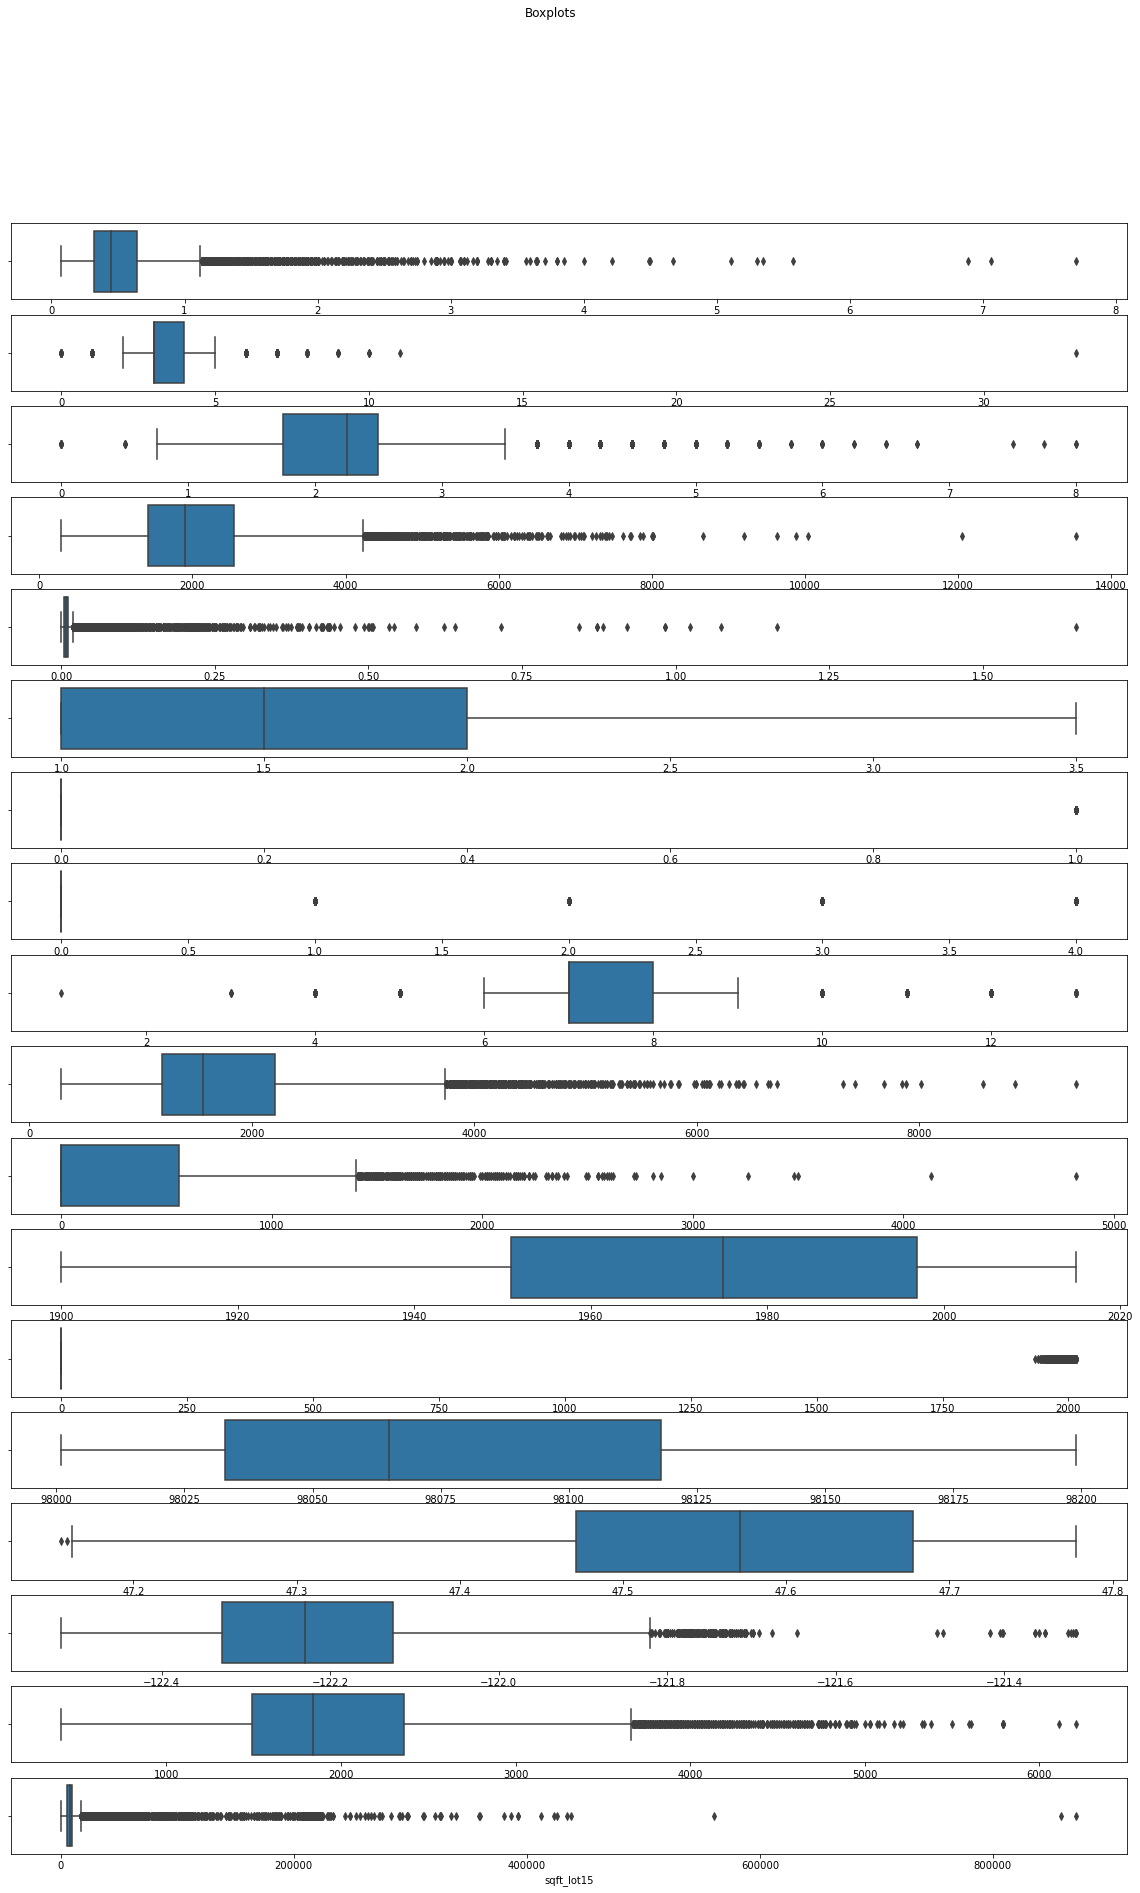

In [30]:
# Checking for Outliers
#
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18) = plt.subplots(18, figsize=(20, 30))
fig.suptitle('Boxplots')
sns.boxplot(housing['price'], ax=ax1)
sns.boxplot(housing['bedrooms'], ax=ax2)
sns.boxplot(housing['bathrooms'], ax=ax3)
sns.boxplot(housing['sqft_living'], ax=ax4)
sns.boxplot(housing['sqft_lot'], ax=ax5)
sns.boxplot(housing['floors'], ax=ax6)
sns.boxplot(housing['waterfront'], ax=ax7)
sns.boxplot(housing['view'], ax=ax8)
sns.boxplot(housing['grade'], ax=ax9)
sns.boxplot(housing['sqft_above'], ax=ax10)
sns.boxplot(housing['sqft_basement'], ax=ax11)
sns.boxplot(housing['yr_built'], ax=ax12)
sns.boxplot(housing['yr_renovated'], ax=ax13)
sns.boxplot(housing['zipcode'], ax=ax14)
sns.boxplot(housing['lat'], ax=ax15)
sns.boxplot(housing['long'], ax=ax16)
sns.boxplot(housing['sqft_living15'], ax=ax17)
sns.boxplot(housing['sqft_lot15'], ax=ax18)



plt.show()

## checking missing data

In [31]:
# Identifying the Missing Data
# ranking
housing.isnull().sum().sum()

0

In [32]:
# checking shape 
housing.shape

(21613, 18)

In [33]:
# Dealing with the Missing Data
#
housing.dropna(inplace=True)

In [34]:
# confirming no missing values

housing.isnull().sum().sum()

0

## checking duplicates

In [35]:
# checking foota duplicates and dropping
housing.duplicated().sum()
housing.drop_duplicates().head()


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
0     0      7        1180              0      1955             0    98178   
1     0      7        2170            400      1951          1991    98125   
2     0      6         770              0      1933             0    98028   
3     0      7        1050            910      1965             0    98136   
4     0      8        1680              0      1987             0    98074   

       lat     long  sqft_living15  sqft_lot15  
0  47.5112 -122.257           1340        5650  
1  47.7210 -122.319           1690        7639  
2  47.7379 -122.233           2720        8062  
3  47.5208 -122.393           1360        5000  
4  47.6168 -122.045           1800        7503

In [37]:
housing.shape

(21613, 18)

## checking anomalies

### using isolation forest

In [39]:
# rank

from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=50, contamination=float(0.1))
isolation_forest.fit(housing['price'].values.reshape(-1, 1))
housing['anomaly_score_rate'] = isolation_forest.decision_function(housing['price'].values.reshape(-1, 1))
housing['anomaly'] = isolation_forest.predict(housing['price'].values.reshape(-1, 1))
housing.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
0     0      7        1180              0      1955             0    98178   
1     0      7        2170            400      1951          1991    98125   
2     0      6         770              0      1933             0    98028   
3     0      7        1050            910      1965             0    98136   
4     0      8        1680              0      1987             0    98074   

       lat     long  sqft_living15  sqft_lot15  anomaly_score_rate  anomaly  
0  47.5112 -122.257           1340        5650            0.051934        1  
1  47.7210 -122.319           1690        7639            0.102863        1  
2  47.7379 -122.233           2720        8062            0.005272        1  
3  47.5208 -122.393           1360        5000            0.094852        1  
4  47.6168 -122.045           1800        7503            0.104193        1

In [40]:
# predicted anomaly
anomaly=housing.loc[housing['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
5      1230000.0         4       4.50         5420    101930     1.0   
21     2000000.0         3       2.75         3050     44867     1.0   
49     1350000.0         3       2.50         2753     65005     1.0   
66      975000.0         4       2.50         2720     11049     2.0   
69     1330000.0         5       2.25         3200     20158     1.0   
...          ...       ...        ...          ...       ...     ...   
21590  1220000.0         4       3.50         4910      9444     1.5   
21593  1090000.0         5       3.75         4170      8142     2.0   
21597  1580000.0         4       3.25         3410     10125     2.0   
21600  1540000.0         5       3.75         4470      8088     2.0   
21606  1010000.0         4       3.50         3510      7200     2.0   

       waterfront  view  grade  sqft_above  sqft_basement  yr_built  \
5               0     0     11        3890           1530      2

In [43]:
# max price

housing['price'].max() 

7700000.0

In [44]:
# min price

housing['price'].min() 

75000.0

In [45]:
# mean house price

housing['price'].mean() 

540182.1587933188

In [47]:
# checking ouliers above the given threshold
outliers_counter = len(housing[housing['price'] > 540182])
outliers_counter

7919

In [49]:
# accuracy of model

print("Accuracy percentage:", 100*list(housing['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 27.225659805531002


In [50]:
# checking our data
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21613 non-null  float64
 1   bedrooms            21613 non-null  int64  
 2   bathrooms           21613 non-null  float64
 3   sqft_living         21613 non-null  int64  
 4   sqft_lot            21613 non-null  int64  
 5   floors              21613 non-null  float64
 6   waterfront          21613 non-null  int64  
 7   view                21613 non-null  int64  
 8   grade               21613 non-null  int64  
 9   sqft_above          21613 non-null  int64  
 10  sqft_basement       21613 non-null  int64  
 11  yr_built            21613 non-null  int64  
 12  yr_renovated        21613 non-null  int64  
 13  zipcode             21613 non-null  int64  
 14  lat                 21613 non-null  float64
 15  long                21613 non-null  float64
 16  sqft

<AxesSubplot:xlabel='price', ylabel='count'>

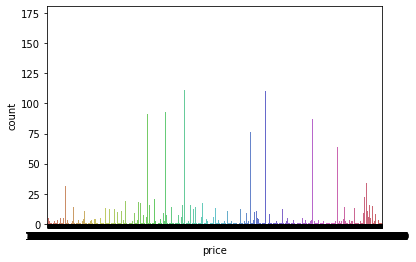

In [51]:
# Checking that our target variables are binary

sns.countplot(x='price',data=housing, palette='hls')

# 6. Exploratory Data Analysis: 

## Univariate analysis

In [52]:
# Ploting the univariate summaries and recording our observations


housing.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.401822e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.673622e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view         grade    sqft_above  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      7.656873   1788.390691   
std        0.539989      0.086517      0.766318      1.175459    828.090978   
min        1.000000      0.000000      0.000000      1.000000    290.000000   
25%        1.000000      0.000000      0.000000      7.000000   1190.000000   
50%        1.500000      0.000000      0.000000      7.000000   1560.000000   
75%        2.000000      0.000000      0.000000      8.000000   2210.000000   
max        3.500000      1.000000      4.000000     13.000000   9410.000000   

       sqft_basement      yr_built  yr_renovated       zipcode           lat  \
count   21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean      291.509045   1971.005136     84.402258  98077.939805     47.560053   
std       442.575043     29.373411    401.679240     53.505026      0.138564   
min         0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%         0.000000   1951.000000      0.000000  98033.000000     47.471000   
50%         0.000000   1975.000000      0.000000  98065.000000     47.571800   
75%       560.000000   1997.000000      0.000000  98118.000000     47.678000   
max      4820.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  anomaly_score_rate  \
count  21613.000000   21613.000000   21613.000000        21613.000000   
mean    -122.213896    1986.552492   12768.455652            0.067663   
std        0.140828     685.391304   27304.179631            0.061023   
min     -122.519000     399.000000     651.000000           -0.299358   
25%     -122.328000    1490.000000    5100.000000            0.062122   
50%     -122.230000    1840.000000    7620.000000            0.089418   
75%     -122.125000    2360.000000   10083.000000            0.102699   
max     -121.315000    6210.000000  871200.000000            0.118999   

            anomaly  
count  21613.000000  
mean       0.800490  
std        0.599359  
min       -1.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [53]:
# quantiles

housing.quantile([0.25,0.5,0.75])

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0.25  321950.0       3.0       1.75       1427.0    5040.0     1.0   
0.50  450000.0       3.0       2.25       1910.0    7618.0     1.5   
0.75  645000.0       4.0       2.50       2550.0   10688.0     2.0   

      waterfront  view  grade  sqft_above  sqft_basement  yr_built  \
0.25         0.0   0.0    7.0      1190.0            0.0    1951.0   
0.50         0.0   0.0    7.0      1560.0            0.0    1975.0   
0.75         0.0   0.0    8.0      2210.0          560.0    1997.0   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0.25           0.0  98033.0  47.4710 -122.328         1490.0      5100.0   
0.50           0.0  98065.0  47.5718 -122.230         1840.0      7620.0   
0.75           0.0  98118.0  47.6780 -122.125         2360.0     10083.0   

      anomaly_score_rate  anomaly  
0.25            0.062122      1.0  
0.50            0.089418      1.0  
0.75            0.102699      1.0

In [54]:
# skewness
housing.skew()

price                  4.021716
bedrooms               1.974300
bathrooms              0.511108
sqft_living            1.471555
sqft_lot              13.060019
floors                 0.616177
waterfront            11.385108
view                   3.395750
grade                  0.771103
sqft_above             1.446664
sqft_basement          1.577965
yr_built              -0.469805
yr_renovated           4.549493
zipcode                0.405661
lat                   -0.485270
long                   0.885053
sqft_living15          1.108181
sqft_lot15             9.506743
anomaly_score_rate    -2.723159
anomaly               -2.671401
dtype: float64

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'anomaly_score_rate'}>,
        <AxesSu

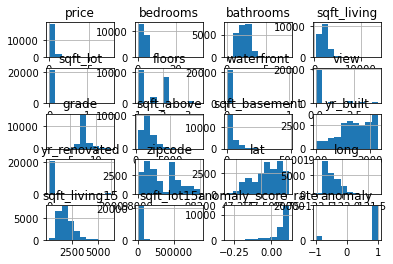

In [55]:
# histogram for total_points 
housing.hist()

The results above show that all our variables are right skewed.

## Bivariate analysis

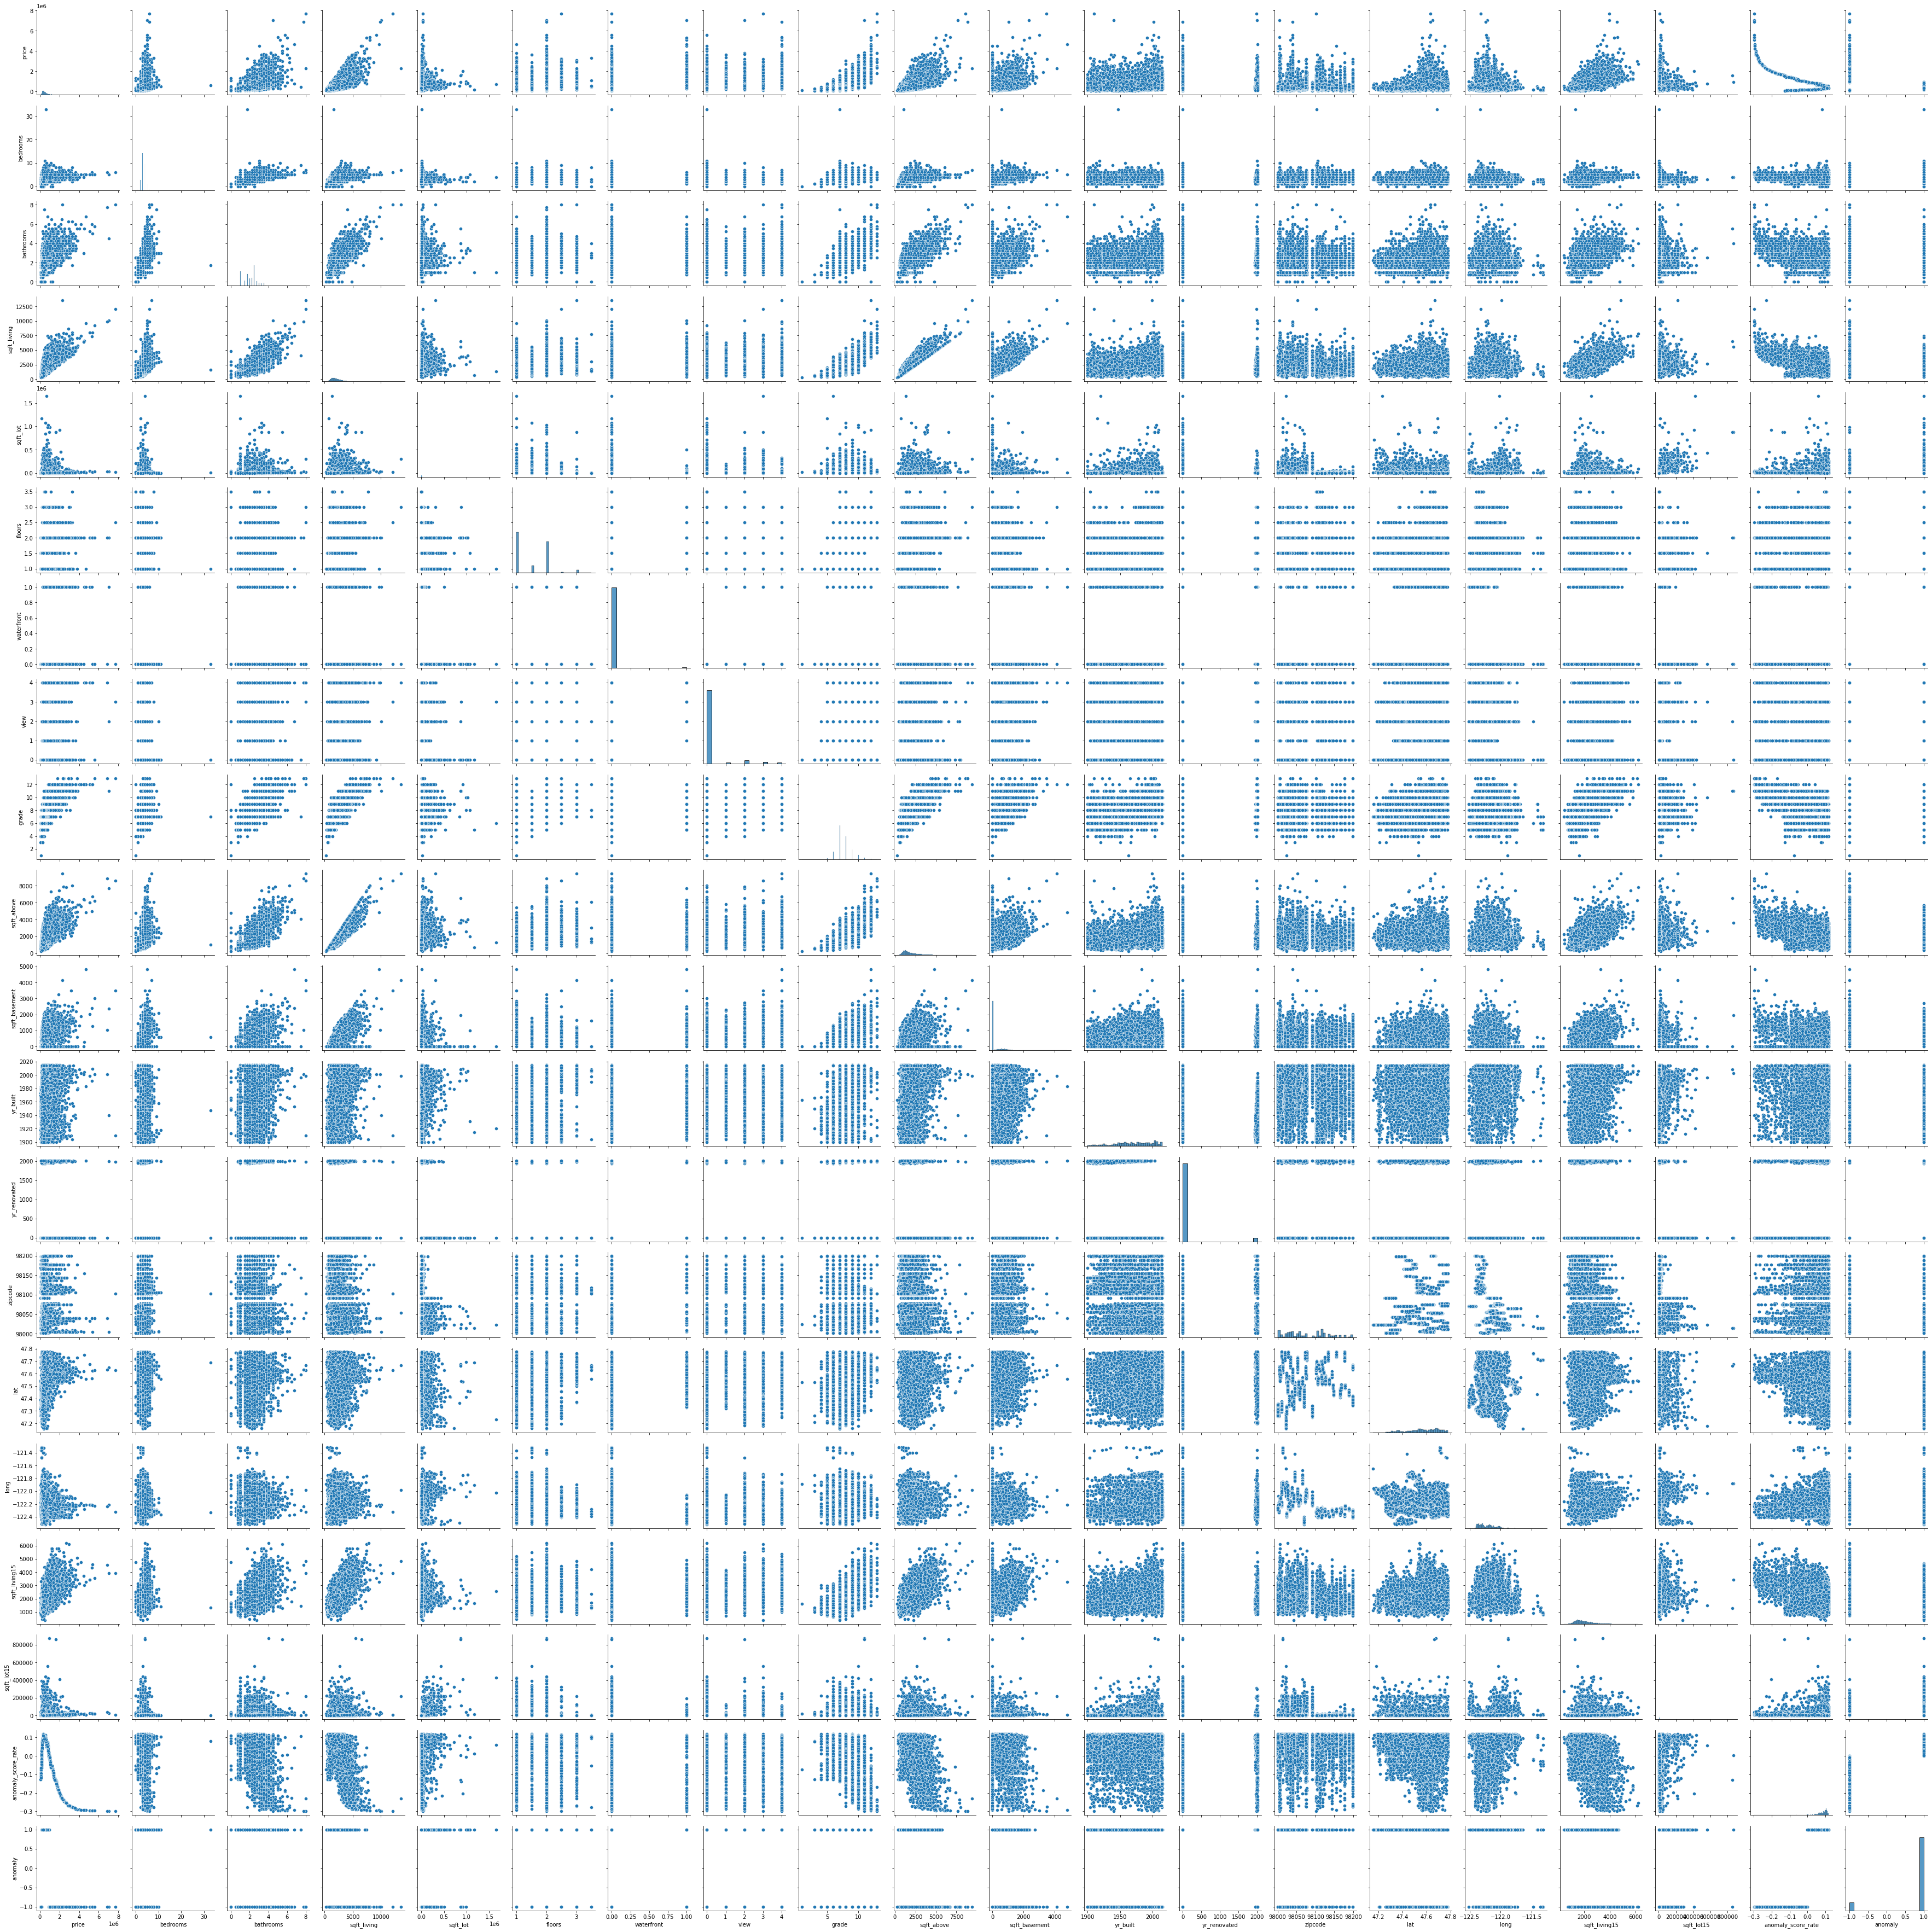

In [56]:
# Ploting the bivariate summaries and recording our observations
# ranking
sns.pairplot(housing)
plt.show()

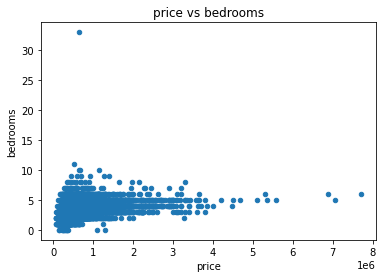

In [58]:
# Using Pandas: Plotting our scatterplot to compare the variables
housing.plot(x = 'price', y = 'bedrooms', kind='scatter')

# Giving our scatterplot a title
plt.title('price vs bedrooms')

# Labelling our x axis
plt.xlabel('price')

# Labelling our y axis
plt.ylabel('bedrooms')

# We then display our scatterplot as shown below
plt.show()

according to the above plots, the total points is not directly affected by the scores of either home side or away.

In [59]:
# general correlation
housing.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot  \
price               1.000000  0.308338   0.525134     0.702044  0.089655   
bedrooms            0.308338  1.000000   0.515884     0.576671  0.031703   
bathrooms           0.525134  0.515884   1.000000     0.754665  0.087740   
sqft_living         0.702044  0.576671   0.754665     1.000000  0.172826   
sqft_lot            0.089655  0.031703   0.087740     0.172826  1.000000   
floors              0.256786  0.175429   0.500653     0.353949 -0.005201   
waterfront          0.266331 -0.006582   0.063744     0.103818  0.021604   
view                0.397346  0.079532   0.187737     0.284611  0.074710   
grade               0.667463  0.356967   0.664983     0.762704  0.113621   
sqft_above          0.605566  0.477600   0.685342     0.876597  0.183512   
sqft_basement       0.323837  0.303093   0.283770     0.435043  0.015286   
yr_built            0.053982  0.154178   0.506019     0.318049  0.053080   
yr_renovated        0.126442  0.018841   0.050739     0.055363  0.007644   
zipcode            -0.053168 -0.152668  -0.203866    -0.199430 -0.129574   
lat                 0.306919 -0.008931   0.024573     0.052529 -0.085683   
long                0.021571  0.129473   0.223042     0.240223  0.229521   
sqft_living15       0.585374  0.391638   0.568634     0.756420  0.144608   
sqft_lot15          0.082456  0.029244   0.087175     0.183286  0.718557   
anomaly_score_rate -0.740780 -0.168133  -0.305382    -0.479496 -0.059376   
anomaly            -0.580151 -0.129566  -0.251515    -0.384100 -0.042890   

                      floors  waterfront      view     grade  sqft_above  \
price               0.256786    0.266331  0.397346  0.667463    0.605566   
bedrooms            0.175429   -0.006582  0.079532  0.356967    0.477600   
bathrooms           0.500653    0.063744  0.187737  0.664983    0.685342   
sqft_living         0.353949    0.103818  0.284611  0.762704    0.876597   
sqft_lot           -0.005201    0.021604  0.074710  0.113621    0.183512   
floors              1.000000    0.023698  0.029444  0.458183    0.523885   
waterfront          0.023698    1.000000  0.401857  0.082775    0.072075   
view                0.029444    0.401857  1.000000  0.251321    0.167649   
grade               0.458183    0.082775  0.251321  1.000000    0.755923   
sqft_above          0.523885    0.072075  0.167649  0.755923    1.000000   
sqft_basement      -0.245705    0.080588  0.276947  0.168392   -0.051943   
yr_built            0.489319   -0.026161 -0.053440  0.446963    0.423898   
yr_renovated        0.006338    0.092885  0.103917  0.014414    0.023285   
zipcode            -0.059121    0.030285  0.084827 -0.184862   -0.261190   
lat                 0.049614   -0.014274  0.006157  0.114084   -0.000816   
long                0.125419   -0.041910 -0.078400  0.198372    0.343803   
sqft_living15       0.279885    0.086463  0.280439  0.713202    0.731870   
sqft_lot15         -0.011269    0.030703  0.072575  0.119248    0.194050   
anomaly_score_rate -0.110184   -0.230481 -0.341783 -0.435191   -0.420846   
anomaly            -0.098867   -0.167290 -0.292320 -0.359091   -0.333697   

                    sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price                    0.323837  0.053982      0.126442 -0.053168  0.306919   
bedrooms                 0.303093  0.154178      0.018841 -0.152668 -0.008931   
bathrooms                0.283770  0.506019      0.050739 -0.203866  0.024573   
sqft_living              0.435043  0.318049      0.055363 -0.199430  0.052529   
sqft_lot                 0.015286  0.053080      0.007644 -0.129574 -0.085683   
floors                  -0.245705  0.489319      0.006338 -0.059121  0.049614   
waterfront               0.080588 -0.026161      0.092885  0.030285 -0.014274   
view                     0.276947 -0.053440      0.103917  0.084827  0.006157   
grade                    0.168392  0.446963      0.014414 -0.184862  0.114084   
sqft_above         

<AxesSubplot:>

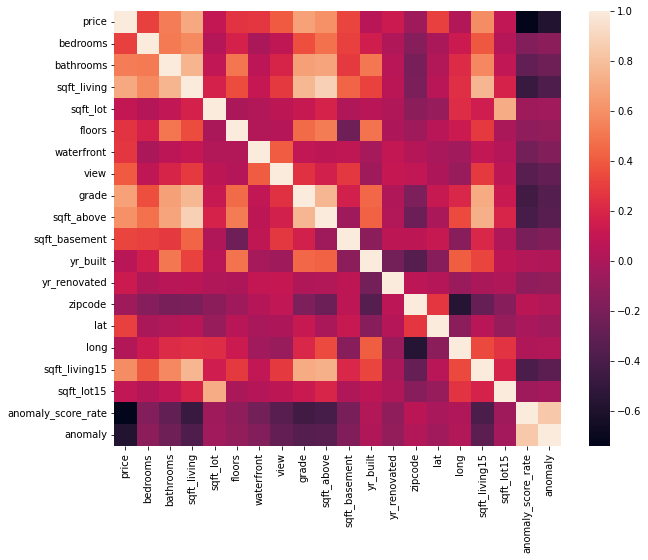

In [60]:
# heatmap for looking at how the variables interact
columns = ('price', 'bedrooms')
f, ax = plt.subplots(figsize=(10, 8))
corr = housing.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

The heat map above shows that the total points are very closely interacting with the previous points. However our target variables do not closely interact with the total points, previous points or rank change.

In [62]:
# correlation
# Calculating the pearson coefficient
pc = housing["price"].corr(housing["bedrooms"], method="pearson") 
print(pc)

# Checking whether you have to define the pearson
coeff = housing["price"].corr(housing["bedrooms"]) 
print(coeff)

0.3083383686880967
0.3083383686880967


In [63]:
housing.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'anomaly_score_rate', 'anomaly'],
      dtype='object')

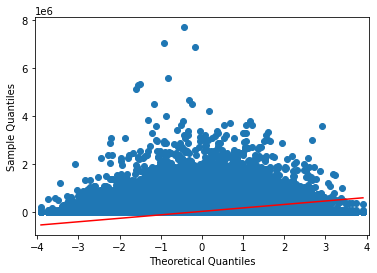

In [64]:
# q-q plot
from statsmodels.graphics.gofplots import qqplot
from numpy.random import seed

# seed the random number generator
seed(1)

# q-q plot
qqplot(housing, line='s')
plt.show()

The data seems not to be following a normal distribution.

## Sampling

In [65]:
# testing ratio
# Non stratified sample
non_strat_output = housing.sample(frac=0.1) 

# check the proportion of the non_stratified sample
print(non_strat_output['price'].value_counts())

450000.0     18
375000.0     18
235000.0     17
400000.0     16
300000.0     16
             ..
717500.0      1
3850000.0     1
905000.0      1
367950.0      1
238950.0      1
Name: price, Length: 990, dtype: int64


In [66]:
# create a random sample
# dropping the naomaly columns
housing = housing.drop(columns=['anomaly_score_rate', 'anomaly'])
# Stratified sample
strat_output_train = housing.groupby('price', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.5))

# proportion of the non_stratified sample
print(housing['price'].value_counts())

# Check the stratified output
print(strat_output_train)

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: price, Length: 3625, dtype: int64
           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
16714    85000.0         2       1.00          910      9753     1.0   
7992     90000.0         1       1.00          780      4000     1.0   
18939    90000.0         3       1.00          980      2490     2.0   
10585    95000.0         2       1.00         1070     20450     1.0   
14581    95000.0         2       1.00          960      7000     1.0   
...          ...       ...        ...          ...       ...     ...   
10446  3400000.0         4       4.00         4260     11765     2.0   
13967  3400000.0         4       3.50         4730     47870     1.0   
15255  3640000.0         4       3.25         4830     22257     2.0   
6508   3650000.0         6       4.75         5480     19401    

In [67]:
strat_output_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9834 entries, 16714 to 7035
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          9834 non-null   float64
 1   bedrooms       9834 non-null   int64  
 2   bathrooms      9834 non-null   float64
 3   sqft_living    9834 non-null   int64  
 4   sqft_lot       9834 non-null   int64  
 5   floors         9834 non-null   float64
 6   waterfront     9834 non-null   int64  
 7   view           9834 non-null   int64  
 8   grade          9834 non-null   int64  
 9   sqft_above     9834 non-null   int64  
 10  sqft_basement  9834 non-null   int64  
 11  yr_built       9834 non-null   int64  
 12  yr_renovated   9834 non-null   int64  
 13  zipcode        9834 non-null   int64  
 14  lat            9834 non-null   float64
 15  long           9834 non-null   float64
 16  sqft_living15  9834 non-null   int64  
 17  sqft_lot15     9834 non-null   int64  
dtypes: f

In [68]:
# preview the stratified train dataset
strat_output_train.head()


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
16714  85000.0         2        1.0          910      9753     1.0   
7992   90000.0         1        1.0          780      4000     1.0   
18939  90000.0         3        1.0          980      2490     2.0   
10585  95000.0         2        1.0         1070     20450     1.0   
14581  95000.0         2        1.0          960      7000     1.0   

       waterfront  view  grade  sqft_above  sqft_basement  yr_built  \
16714           0     0      5         910              0      1947   
7992            0     0      5         780              0      1905   
18939           0     0      6         980              0      1969   
10585           0     0      6        1070              0      1948   
14581           0     0      4         960              0      1918   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
16714             0    98032  47.3897 -122.236           1160        7405  
7992              0    98108  47.5424 -122.321           1150        4000  
18939             0    98092  47.3170 -122.182            980        3154  
10585             0    98058  47.4338 -122.183           1360       15581  
14581             0    98198  47.3864 -122.307           1850        8120

In [69]:
# Stratified test sample

test_strat_dataset = housing.drop(strat_output_train.index)

# Preview the stratified test dataset
test_strat_dataset.head()


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
1  538000.0         3       2.25         2570      7242     2.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   
6  257500.0         3       2.25         1715      6819     2.0           0   
7  291850.0         3       1.50         1060      9711     1.0           0   

   view  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
1     0      7        2170            400      1951          1991    98125   
3     0      7        1050            910      1965             0    98136   
4     0      8        1680              0      1987             0    98074   
6     0      7        1715              0      1995             0    98003   
7     0      7        1060              0      1963             0    98198   

       lat     long  sqft_living15  sqft_lot15  
1  47.7210 -122.319           1690        7639  
3  47.5208 -122.393           1360        5000  
4  47.6168 -122.045           1800        7503  
6  47.3097 -122.327           2238        6819  
7  47.4095 -122.315           1650        9711

In [70]:
test_strat_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11779 entries, 1 to 21611
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          11779 non-null  float64
 1   bedrooms       11779 non-null  int64  
 2   bathrooms      11779 non-null  float64
 3   sqft_living    11779 non-null  int64  
 4   sqft_lot       11779 non-null  int64  
 5   floors         11779 non-null  float64
 6   waterfront     11779 non-null  int64  
 7   view           11779 non-null  int64  
 8   grade          11779 non-null  int64  
 9   sqft_above     11779 non-null  int64  
 10  sqft_basement  11779 non-null  int64  
 11  yr_built       11779 non-null  int64  
 12  yr_renovated   11779 non-null  int64  
 13  zipcode        11779 non-null  int64  
 14  lat            11779 non-null  float64
 15  long           11779 non-null  float64
 16  sqft_living15  11779 non-null  int64  
 17  sqft_lot15     11779 non-null  int64  
dtypes: flo

In [71]:
test_strat_dataset.tail()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
21606  1010000.0         4       3.50         3510      7200     2.0   
21607   475000.0         3       2.50         1310      1294     2.0   
21609   400000.0         4       2.50         2310      5813     2.0   
21610   402101.0         2       0.75         1020      1350     2.0   
21611   400000.0         3       2.50         1600      2388     2.0   

       waterfront  view  grade  sqft_above  sqft_basement  yr_built  \
21606           0     0      9        2600            910      2009   
21607           0     0      8        1180            130      2008   
21609           0     0      8        2310              0      2014   
21610           0     0      7        1020              0      2009   
21611           0     0      8        1600              0      2004   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
21606             0    98136  47.5537 -122.398           2050        6200  
21607             0    98116  47.5773 -122.409           1330        1265  
21609             0    98146  47.5107 -122.362           1830        7200  
21610             0    98144  47.5944 -122.299           1020        2007  
21611             0    98027  47.5345 -122.069           1410        1287

In [72]:
# count of homescore
test_strat_count=test_strat_dataset['price'].value_counts()
train_strat_count=strat_output_train['price'].value_counts()



## 7. Implementing the Solution

### encoding categorical variables

### Detecting multicollinearity

### Residual plots and heteroskedasticity testing

### barlett's test

## Multiple Linear Regression

### k fold validation

## 8. Challenging the solution